# ❤️❤️❤️ Speed Dating ❤️❤️❤️

 We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.
***

## Necessary imports

In [36]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #showing truncated results for readability
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [107]:
url = 'https://raw.githubusercontent.com/Swellisgood/pythonista-data-science-ninja/main/speed-dating/Speed%20Dating%20Data.csv'
df = pd.read_csv(url, encoding = "ISO-8859-1")

In [92]:
df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

When first inspecting the raw dataFrame df, we can see there are lots of columns with high counts of missing values. Let's do some preliminary data cleaning :
- We'll determine missing value ratios for each column.
- Then we drop any column with more than 30 % missing values altogether (since they'll likely provide little to no input in the context of our analysis)

In [106]:
df.isna().sum() * 100 / len(df)

iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
wave         0.000000
round        0.000000
position     0.000000
positin1    22.033898
order        0.000000
partner      0.000000
pid          0.119360
match        0.000000
int_corr     1.885892
samerace     0.000000
age_o        1.241346
race_o       0.871330
pf_o_att     1.062306
pf_o_sin     1.062306
pf_o_int     1.062306
pf_o_fun     1.169730
pf_o_amb     1.277154
pf_o_sha     1.539747
dec_o        0.000000
attr_o       2.530437
sinc_o       3.425639
intel_o      3.652423
fun_o        4.296968
amb_o        8.617809
shar_o      12.843161
like_o       2.984006
prob_o       3.795655
met_o        4.595369
age          1.133922
field        0.751969
field_cd     0.978754
undergra    41.346383
mn_sat      62.604440
tuition     57.233230
race         0.751969
imprace      0.942946
imprelig     0.942946
from         0.942946
zipcode     12.699928
income      48.925758
goal      

In [97]:
missing_values = df.isna().sum()*100 / df.shape[0]

drop_list = []
for key, value in missing_values.items():
    if value > 30.0:
        drop_list.append(key)

print(drop_list)

['undergra', 'mn_sat', 'tuition', 'income', 'expnum', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']


In [96]:
df_clean = df.drop(drop_list, axis=1)
df_clean.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [115]:
print(f'previous DataFrame shape was : {df.shape} ')
print(f'new DataFrame shape is : {df_clean.shape} \n')

col_removed = df.shape[1] - df_clean.shape[1]
missing_ratio_mean = (df_clean.isna().sum() *100 / len(df)).mean()

print(f'We have a mean of {missing_ratio_mean:.2f} % of missing values in the new DataFrame by removing {col_removed} columns !')

previous DataFrame shape was : (8378, 195) 
new DataFrame shape is : (8378, 112) 

We have a mean of 4.37 % of missing values in the new DataFrame by removing 83 columns !


In [116]:
personal = ['gender', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec', 'dec_o'
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal']

speed_dating_df = df[['iid', 'wave'] + personal + evaluation + outcome ].drop_duplicates().copy()

In [75]:
df["gender"] = df["gender"].replace({0:"Female", 1:"Male"})
df["match"] = df['match'].replace({0:"no", 1:"yes"}) 
df["dec"] = df["dec"].replace({0:"no",1:"yes"})
df["dec_o"] = df["dec_o"].replace({0:"no",1:"yes"})

In [105]:
df_clean[['dec','dec_o','match']]

,dec,dec_o,match
0,1,0,0
1,1,0,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
8373,0,1,0
8374,0,0,0
8375,0,0,0
8376,0,1,0


## 🔍 Who is participating to this speed dating event ? - Exploratory Data Analysis 🔍

---

Let's explore the dataset in terms of defining features that describe the participants.
Age, gender, race, field of study, and more will be explored here. \
We know that these events were dedicated to **partners of the *opposite* gender**. \
In this intance, we have a dataset composed of :

In [39]:
speed_dating_df['gender'] = speed_dating_df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(speed_dating_df.gender)
speed_dating_df.gender.value_counts(dropna=False)

Male      277
Female    274
Name: gender, dtype: int64

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Age Distribution')]

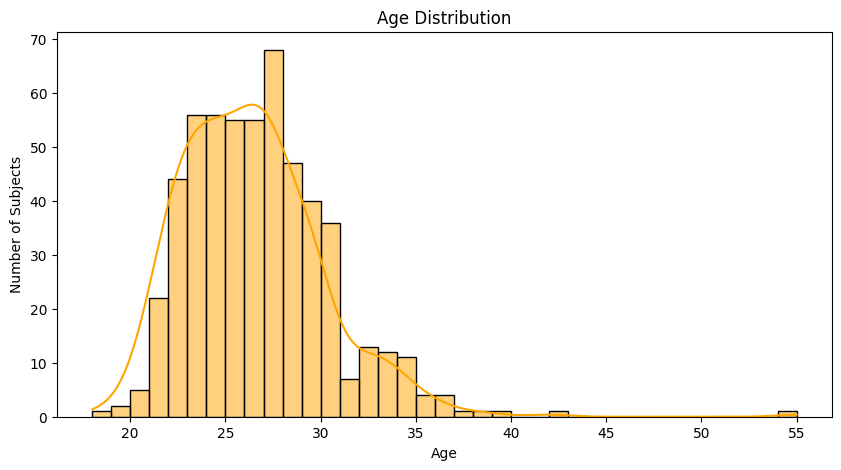

In [40]:
#Age Distribution using Seaborn
plt.figure(figsize=(10, 5))
#sns.set_palette('bright')
ax = sns.histplot(speed_dating_df['age'], kde=True, binwidth=1, color='orange')
ax.set(xlabel="Age", ylabel="Number of Subjects", title="Age Distribution")

In [41]:
speed_dating_df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

In [43]:
# assign all NaN values in the age column to the average age
speed_dating_df["age"] = speed_dating_df["age"].fillna(round(speed_dating_df["age"].median(),1))
speed_dating_df["age"] = speed_dating_df["age"].astype(int)

In [44]:
speed_dating_df.isna().sum()['age']

0

In [45]:
speed_dating_df['age'].describe()

count    551.000000
mean      26.353902
std        3.739711
min       18.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64

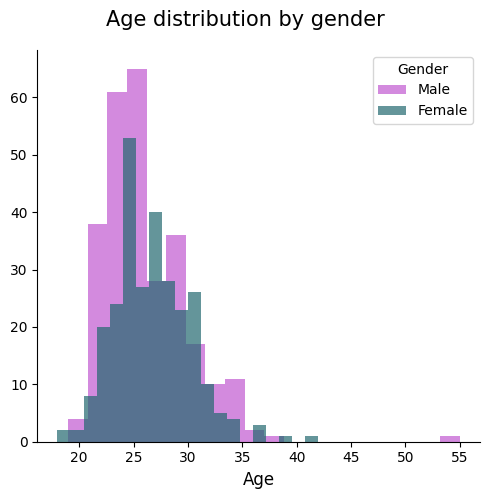

In [46]:
g = sns.FacetGrid(speed_dating_df, hue='gender', height = 5, palette=['#C159D1','#236970'])
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
legend = plt.legend(['Male', 'Female'])
legend.set_title('Gender')

In young adults (aged 20 to 27) and middle-aged adults (34-37), there is a higher proportion of female participants than males. However, a higher proportion of male participants is shown in the age range 28-33.

<AxesSubplot: ylabel='imprace'>

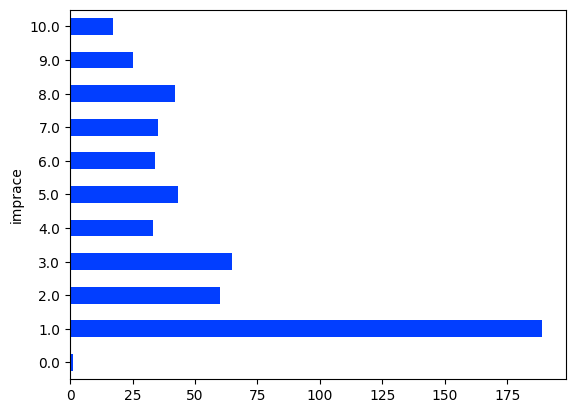

In [49]:
speed_dating_df.groupby("imprace").size().plot(kind="barh")

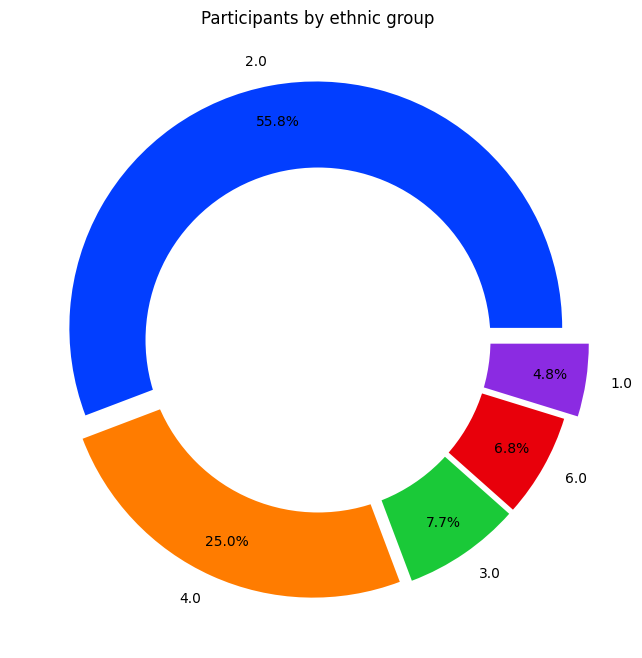

In [57]:
races = list((speed_dating_df['race'].value_counts() *100 / speed_dating_df.shape[0]).index)
races_perc = list((speed_dating_df['race'].value_counts() *100 / speed_dating_df.shape[0]).values)

explode = (0.05,0.05,0.05,0.05,0.1)

plt.figure(figsize=(8,8))
plt.pie(races_perc, labels=races, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title("Participants by ethnic group")

plt.show()

---

### Goals and Habits.
In this subsection, we will see what the participants declared to be their intentions to be and what they usually do in terms of going out and dating.

In [50]:
speed_dating_df['goal'] = speed_dating_df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'Ididit', 6:'Other'}).fillna(speed_dating_df.goal)

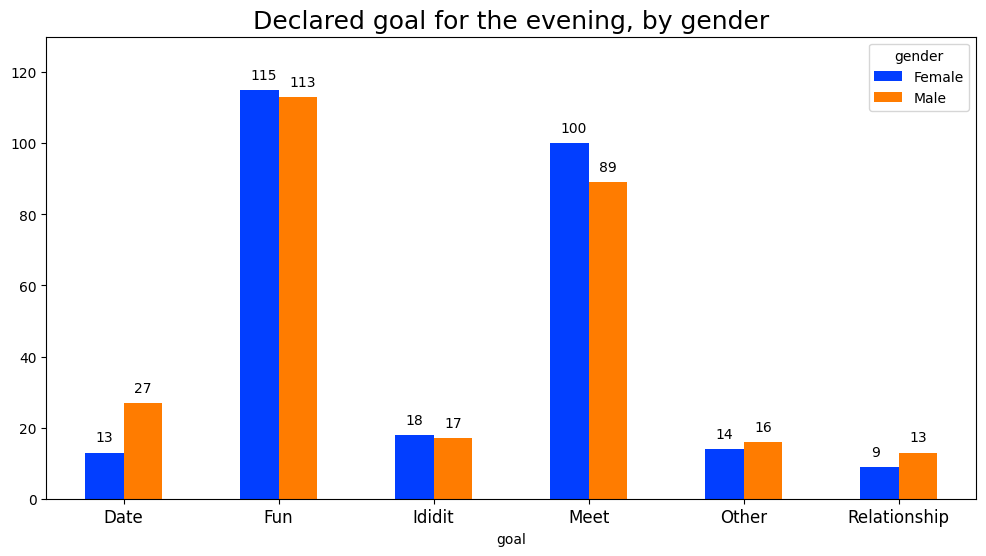

In [51]:
tmp = speed_dating_df[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,130))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Declared goal for the evening, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=10)

In [60]:
goals = speed_dating_df['goal'].value_counts()*100 / speed_dating_df.shape[0]
date = speed_dating_df['date'].value_counts()*100 / speed_dating_df.shape[0]
go_out = speed_dating_df['go_out'].value_counts()*100 / speed_dating_df.shape[0]

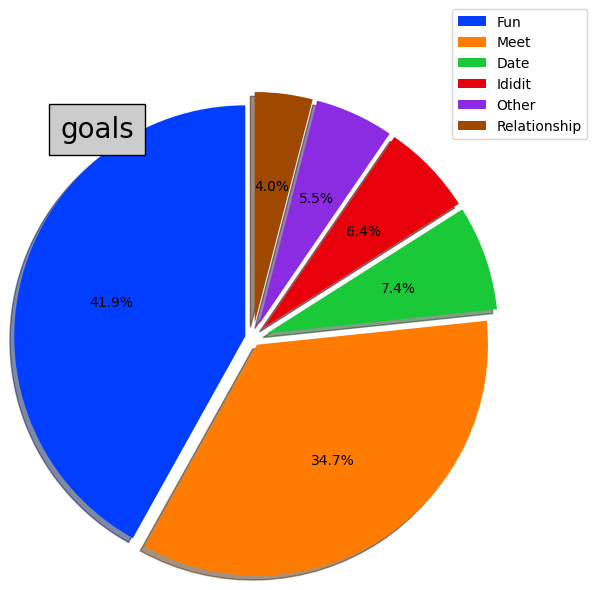

In [62]:
plt.figure(figsize=(5,5))
plt.pie(goals,
        explode = [0.05,0.05,0.1,0.1,0.1,0.1],
        autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(goals.index, bbox_to_anchor=(1,1))
plt.title('goals', loc='left', fontsize=20,bbox={'facecolor':'0.8', 'pad':8})
plt.show()

In [28]:
#checking for missing values
speed_dating_df.isna().sum()['goal']

7

In [30]:
speed_dating_df['goal'].value_counts()

1.0    228
2.0    189
3.0     40
5.0     35
6.0     30
4.0     22
Name: goal, dtype: int64

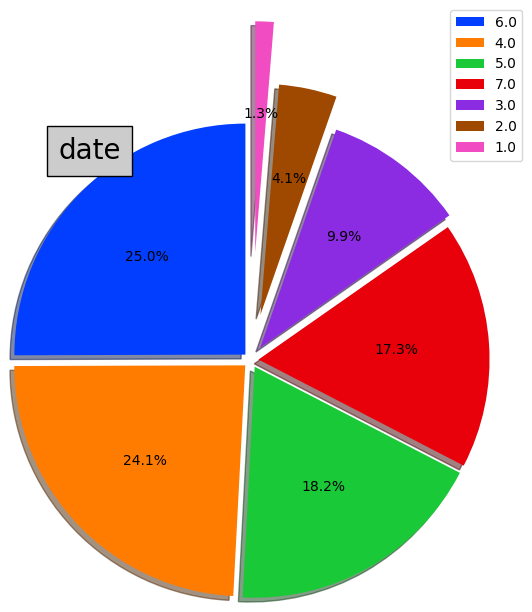

In [63]:
plt.figure(figsize=(5,5))
plt.pie(date,
        autopct='%1.1f%%',
        explode = [0.05,0.05,0.05,0.05,0.1,0.3,0.7],
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(date.index, bbox_to_anchor=(1,1))
plt.title('date', loc='left', fontsize=20,bbox={'facecolor':'0.8', 'pad':8})
plt.show()

---

## Attributes that participants look for in their partners

In [54]:
# extract attributes related data and change the columns lables, all with the subject identifer and his gender
attributes = df[['iid','gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
attributes.columns = ['id', 'gender','attractive', 'sincere','intelligent','fun','ambitious','shared_interests'] 


In [ ]:
# check for duplicates, especially in the 'id' column
F.duplicates_count(dataset)

In [13]:
speed_dating_df['race'] = speed_dating_df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian',5: 'NativeAmer', 6: 'Other'}).fillna(speed_dating_df.race)
df['race'] = df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 5: 'NativeAmer', 6: 'Other'}).fillna(df.race)
df['race_o'] = df.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 5: 'NativeAmer', 6: 'Other'}).fillna(df.race_o)
speed_dating_df.race.value_counts(dropna=False)

White       304
Asian       136
Hispanic     42
Other        37
Black        26
NaN           6
Name: race, dtype: int64

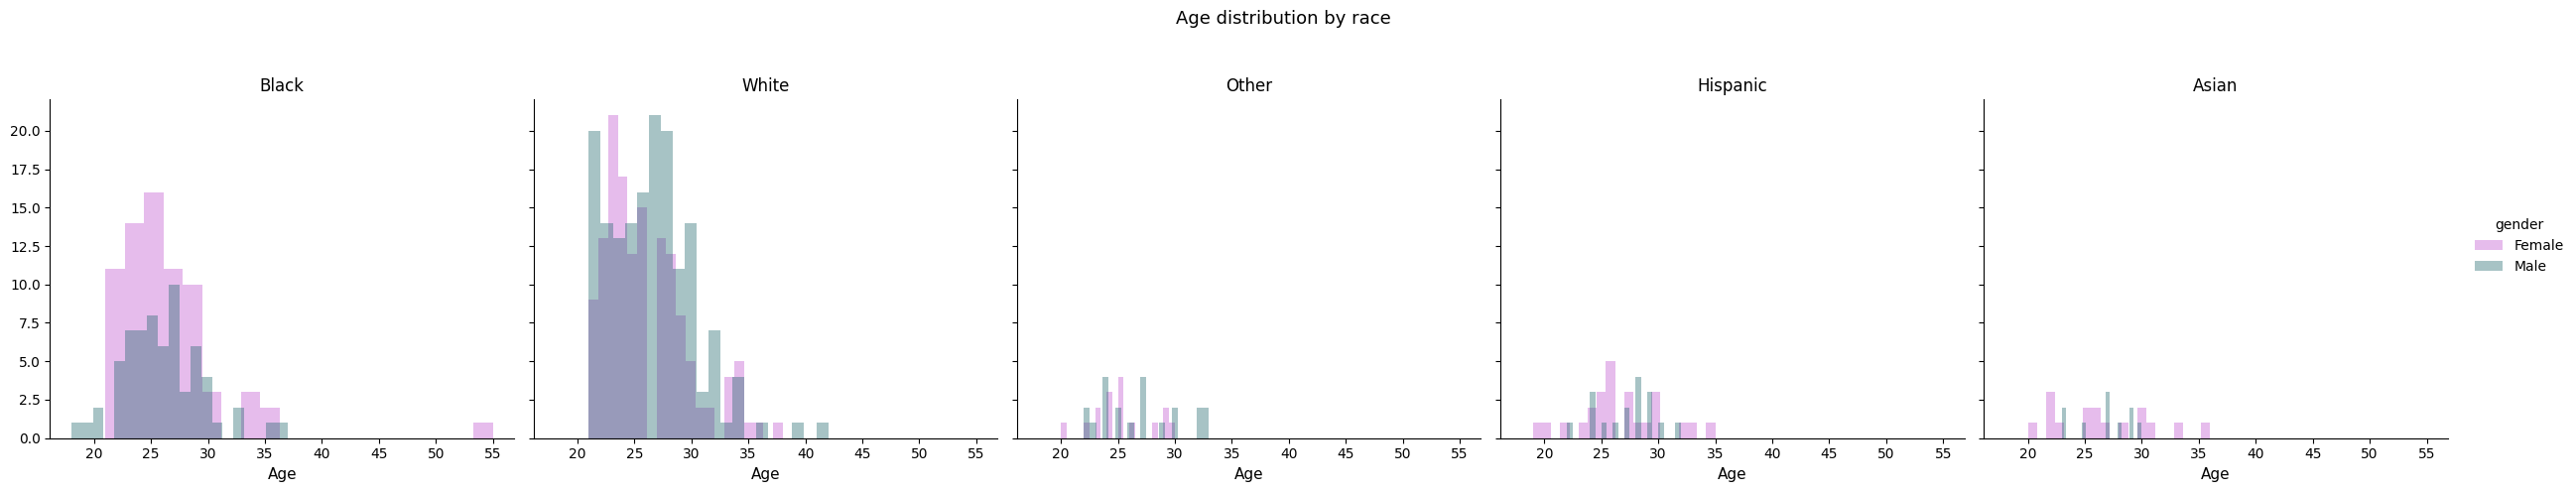

In [14]:
g = sns.FacetGrid(speed_dating_df, col='race', hue='gender', height = 5, palette=['#C159D1','#236970'])
g.map(plt.hist, 'age', bins=20, alpha = 0.4)
axes = g.axes.flatten()
axes[0].set_title("Black")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Asian")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

In [15]:
speed_dating_df[['race', 'age']].groupby('race').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
               mean median   min   max count
race                                        
Asian     26.198529   26.0  18.0  55.0   136
Black     26.692308   27.0  20.0  36.0    26
Hispanic  26.785714   27.0  19.0  35.0    42
Other     26.162162   25.0  20.0  33.0    37
White     26.367550   26.0  21.0  42.0   302

---

In [18]:
speed_dating_df.isnull().sum()

iid           0
wave          0
gender        0
age           8
field         6
field_cd      7
undergra    236
mn_sat      349
tuition     317
race          6
imprace       7
imprelig      7
from          7
zipcode      76
income      270
goal          7
date          8
go_out        7
career        8
career_c     12
sports        7
tvsports      7
exercise      7
dining        7
museums       7
art           7
hiking        7
gaming        7
clubbing      7
reading       7
tv            7
theater       7
movies        7
concerts      7
music         7
shopping      7
yoga          7
exphappy      8
expnum      425
match_es     72
satis_2      66
length       66
numdat_2     69
you_call    288
them_cal    288
date_3      288
numdat_3    458
num_in_3    511
dtype: int64

 let's see how many speed daters found a match!

In [33]:

pd.crosstab(index=speed_dating_df['match'],columns="count")

KeyError: 'match'

Looks like roughly 20% of participants found a **match**.  
Now let's narrow the Dataset :

In [ ]:
dating_1 = df.iloc[:, 11:28]
dating_2 = df.iloc[:, 30:35]
dating_3 = df.iloc[:, 39:43]
dating_4 = df.iloc[:, 45:67]
dating_5 = df.iloc[:, 69:74]
dating_6 = df.iloc[:, 87:91]
dating_7 = df.iloc[:, 97:102]
dating_8 = df.iloc[:, 104:107]

date = pd.concat([df.iloc[:, 0],df.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

speed_dating_df1 = df[['iid', 'wave'] + personal + decision + evaluation + outcome ].drop_duplicates().copy()

In [ ]:
# counting null values
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [ ]:
# removing null rows
date2 = date.dropna()

In [ ]:
# checking datatypes
date2.dtypes

iid           int64
gender        int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o       object
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
race         object
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64


In [ ]:
# creating an object-free dataframe for later use
date3 = date2.drop(['field', 'from', 'career'], axis=1)

<AxesSubplot:title={'center':'Correlation Heatmap'}>

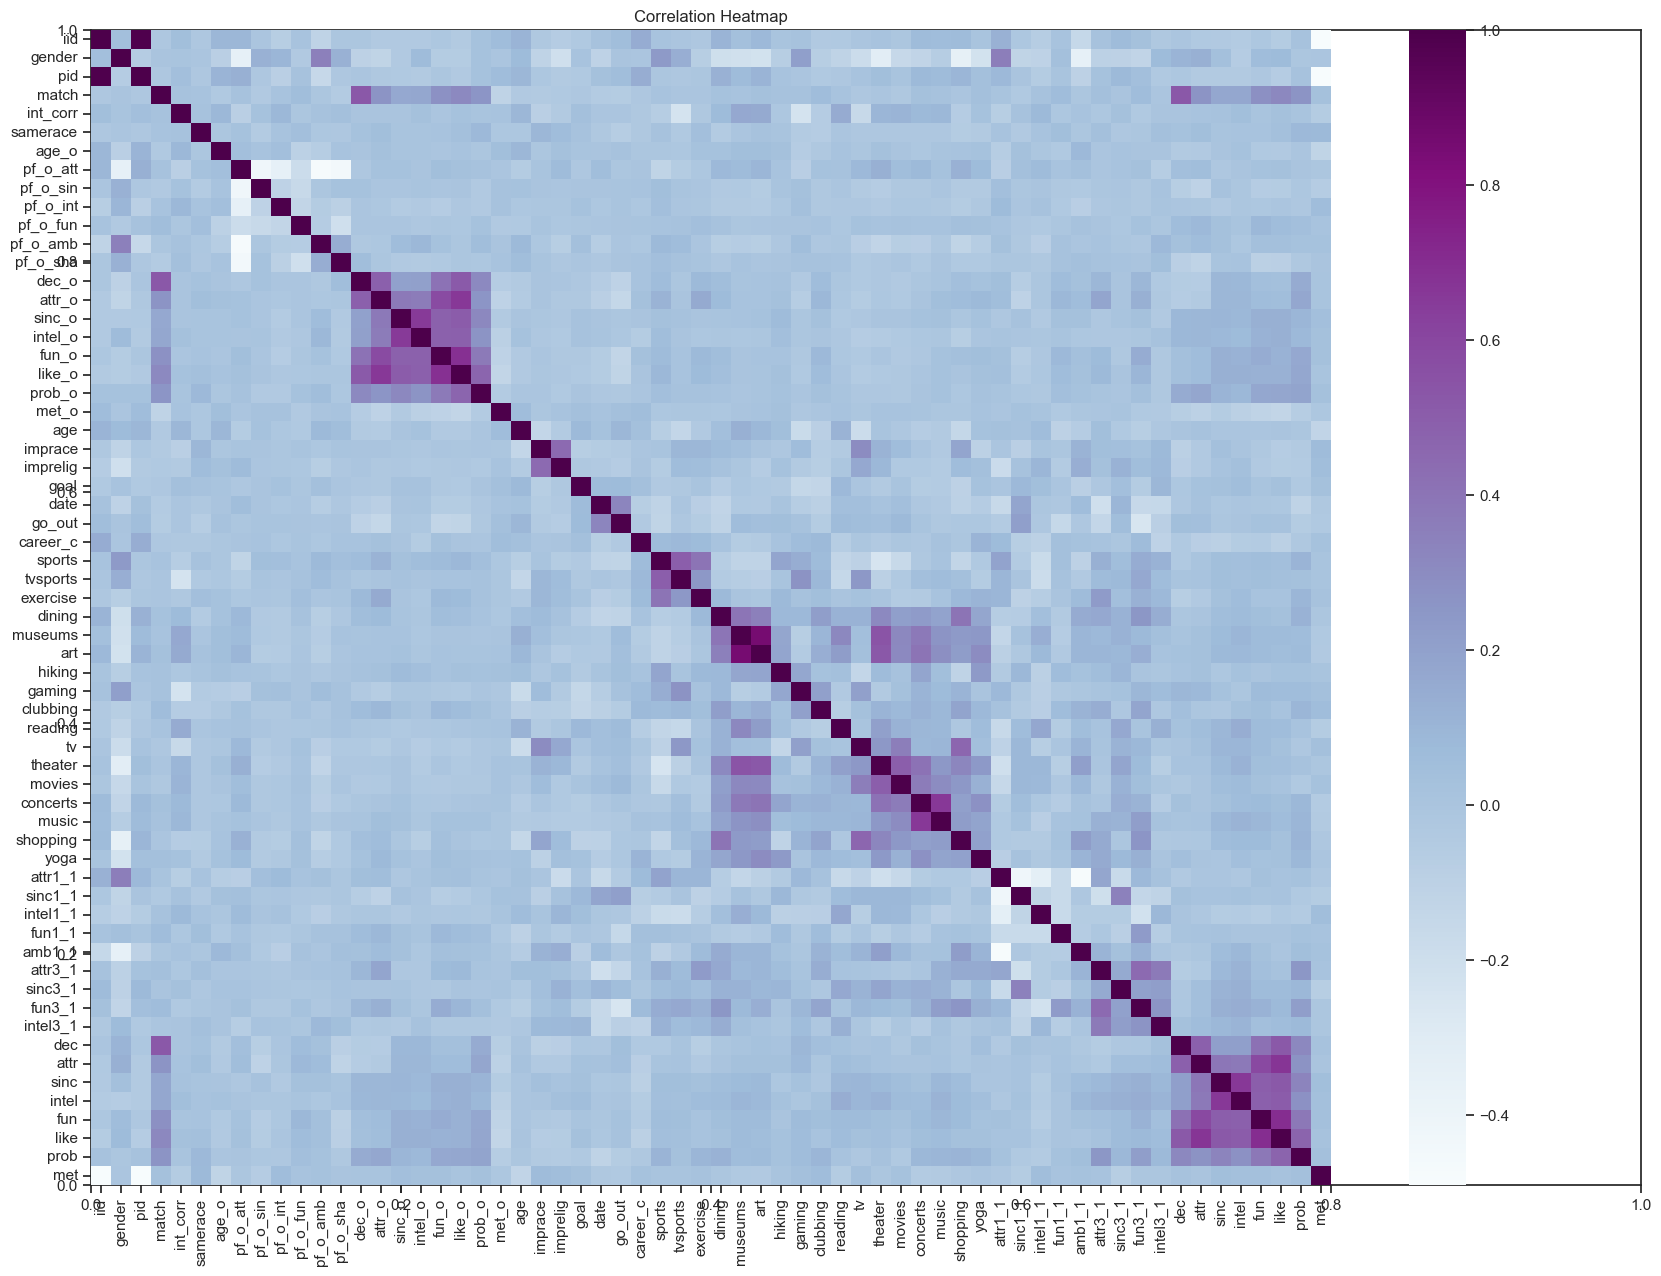

In [ ]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="BuPu")

Some interesting observations can be made when considering the heatmap above.

For example, men (gender = 1) seem to prefer attractive partners (attr1_1) while women (gender = 0) seem to have a preference for partners with ambition (amb1_1).

In [ ]:
men = df[df['gender']=='male']
women = df[df['gender']=='female']
match = df[df['match']=='yes']

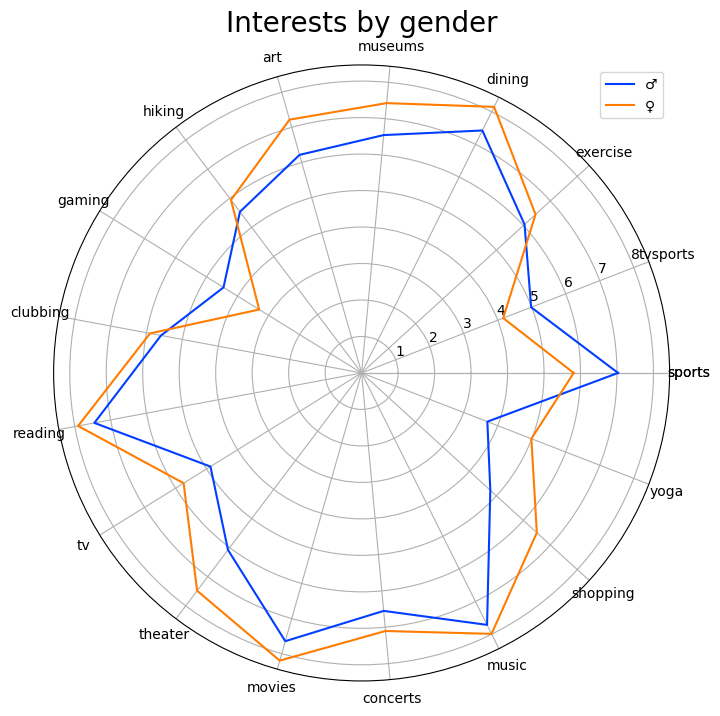

In [ ]:
activities = list(df.loc[:,"sports":"yoga"].columns)

man_activities = []
for x in activities:
    man_activities.append(df[df['gender']=="Male"][x].mean())

woman_activities = []
for x in activities:
    woman_activities.append(df[df['gender']=="Female"][x].mean())
    
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(man_activities), endpoint=False)
label_loc= np.concatenate((label_loc, [label_loc[0]]))

activities.append(activities[0])
man_activities.append(man_activities[0])
woman_activities.append(woman_activities[0])

plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(label_loc, man_activities, label='♂')
plt.plot(label_loc, woman_activities, label='♀')
plt.title('Interests by gender', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=activities)
plt.legend()
plt.show()

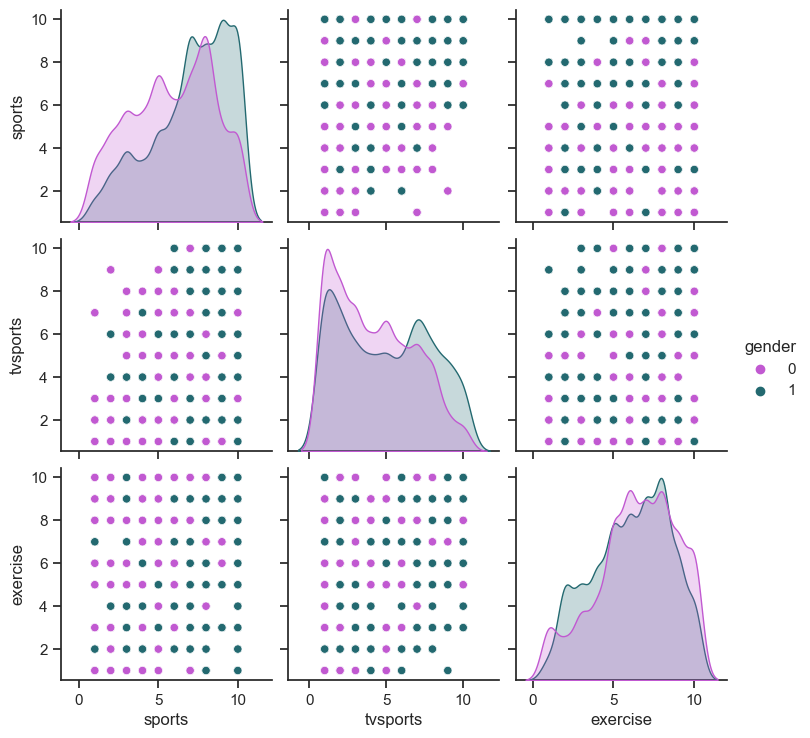

In [ ]:
#interest overlapJ
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:33]],axis = 1)
g = sns.pairplot(date_int, hue='gender', palette=['#C159D1','#236970'])

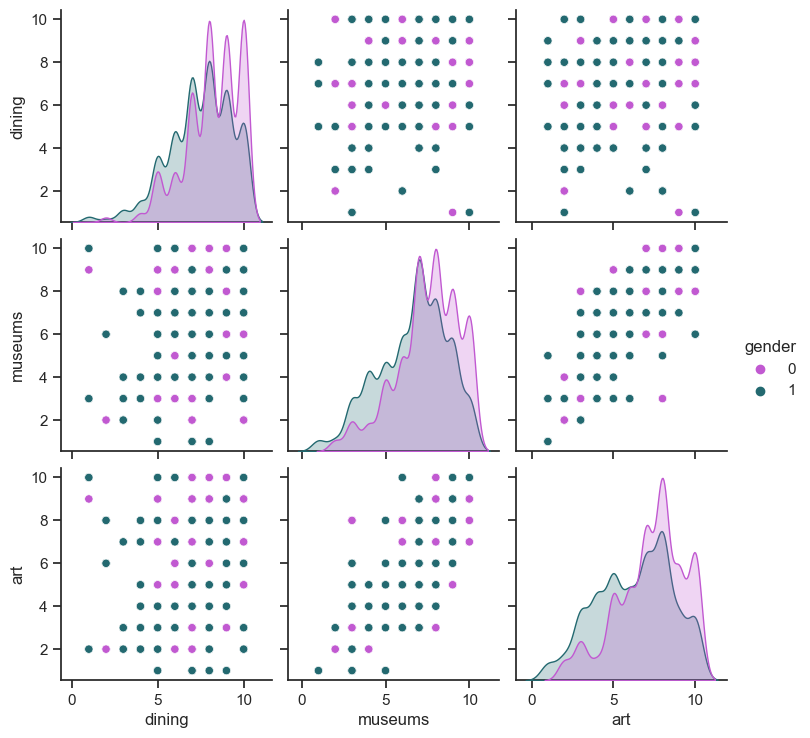

In [ ]:
#looking at interest overlap : dining, museums, art
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender", palette=['#C159D1','#236970'])

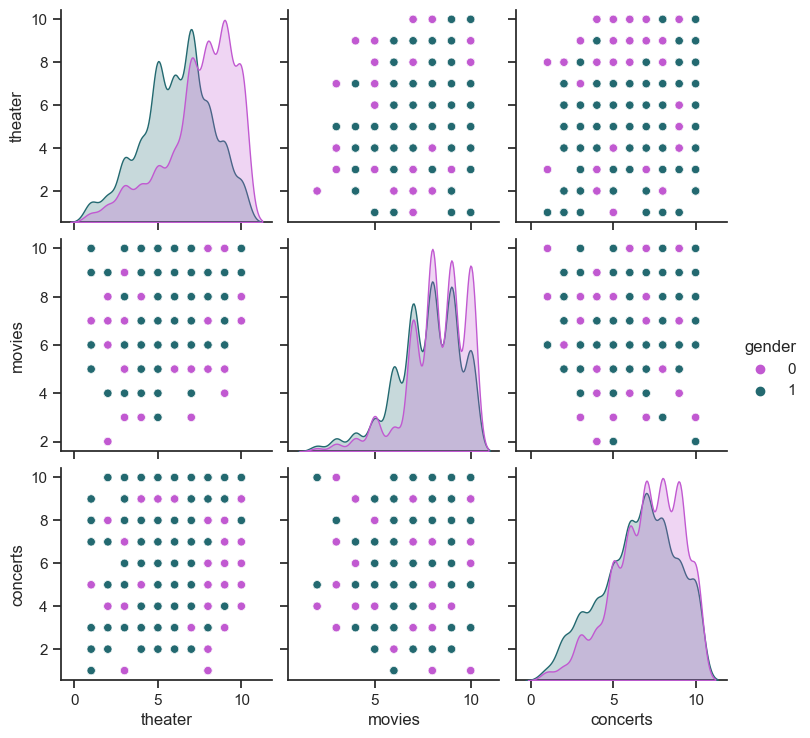

In [ ]:
#looking at interest overlap : concerts, movies, theater
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender", palette=['#C159D1','#236970'])

These charts seem to indicate that a **good date** that is likely to be enjoyed by both genders involves _**movies**_ or _**dining**_, since the distributions depending on gender overlap quite well regarding those two interests.
However, if we refer back to the heatmap, we can see that **none of the interests really correlate with the match outcome**!

---